Desafio Audset

O propósito do desafio é dividido em 3 fases.

Os insumos estão na pasta IMAGENS_PLANET e no arquivo gleba01.geojson, assim como os requirements no arquivo requirements.txt

Primeira fase é calcular o NDVI de cada imagem e salvar o índice na imagem processada.

In [1]:
import rasterio
import numpy

from matplotlib import pyplot
from os import path

DATA_FOLDER = 'data'
INPUT_FOLDER = 'IMAGENS_PLANET'
OUTPUT_FOLDER = 'ndvi_images'
IMAGE_NAME = '20171005_125938_1021.tif'

input_file = path.join(DATA_FOLDER, INPUT_FOLDER, IMAGE_NAME)
src = rasterio.open(input_file)

In [2]:
#Número de Bandas
src.count

4

In [3]:
#B1: Azul; B2: Verde; B3: Vermelho; B4: Infravermelho próximo
band_red = src.read(3)
band_red.shape


(765, 727)

In [4]:
band_nir = src.read(4)
band_nir.shape

(765, 727)

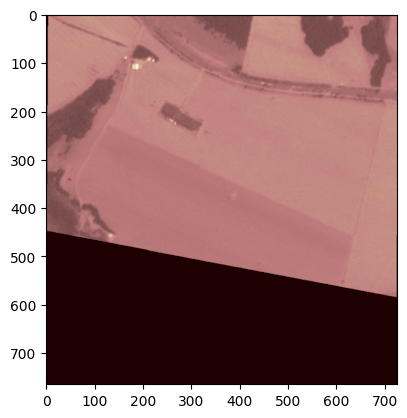

In [5]:
pyplot.imshow(band_red, cmap='pink')
pyplot.show()

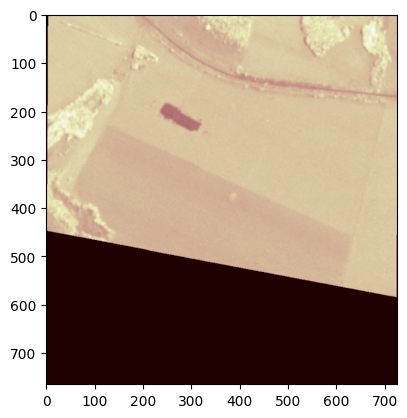

In [6]:
pyplot.imshow(band_nir, cmap='pink')
pyplot.show()

In [7]:
# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)
ndvi.shape

(765, 727)

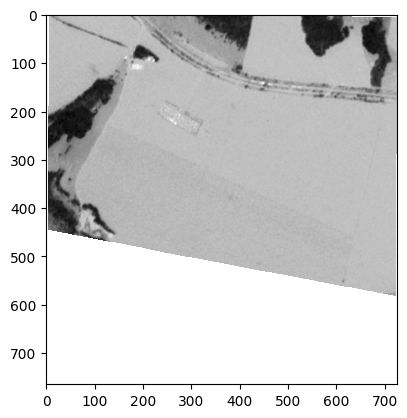

In [8]:
pyplot.imshow(ndvi, cmap='Greys')
pyplot.show()

In [9]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
output_file = path.join(DATA_FOLDER, OUTPUT_FOLDER, IMAGE_NAME)
with rasterio.open(output_file, 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

In [10]:
out = rasterio.open(output_file)
band_ndvi = out.read(1)
band_ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

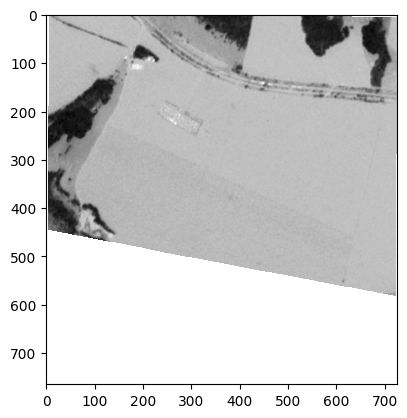

In [11]:

pyplot.imshow(band_ndvi, cmap='Greys')
pyplot.show()